### **Importing Libraries**

In [141]:
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
from sklearn import metrics
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split

### Reading csv

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.shape

(200, 5)

### Data Cleaning

In [8]:
# The data is already clean.
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.head()

,CustomerID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Exploratory Data Analysis**

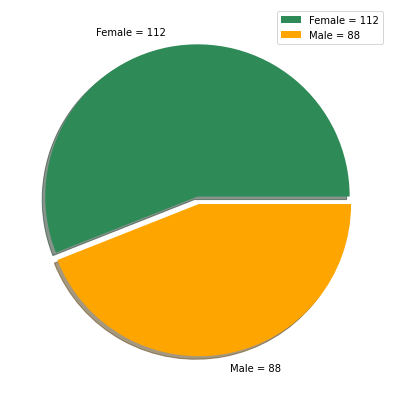

In [11]:
f =  df['Gender'].value_counts()[0]
m = df['Gender'].value_counts()[1]
plt.figure(figsize=(7,7))
size=df['Gender'].value_counts()
label=[f'Female = {f}', f'Male = {m}']
color=['seagreen','orange']
explode=[0,0.05]
fig = plt.pie(size,explode=explode,labels=label,colors=color, shadow = True)
plt.legend()
plt.show()

Text(0.5, 0.98, 'Age Analysis')

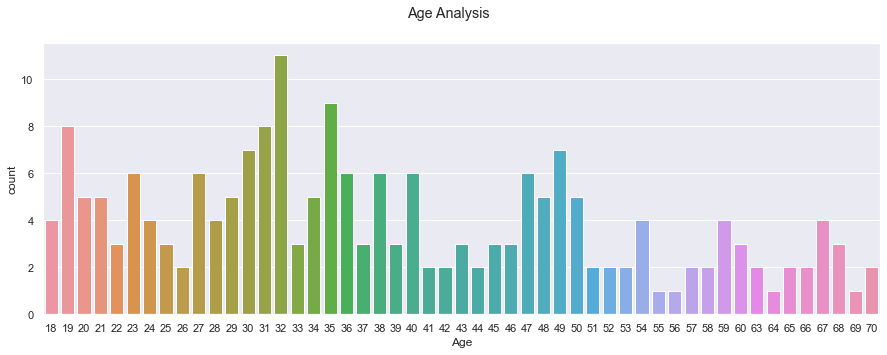

In [34]:
plt.figure(figsize = (15,5))
sns.countplot(df['Age'])
plt.suptitle('Age Analysis')

<AxesSubplot:xlabel='Gender', ylabel='SpendScore'>

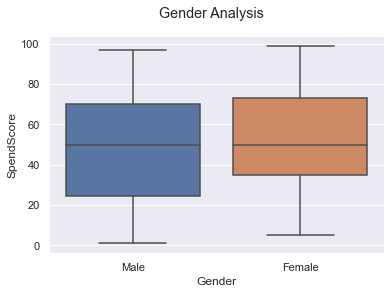

In [36]:
plt.suptitle('Gender Analysis')
sns.boxplot(df['Gender'],df['SpendScore'])

<AxesSubplot:xlabel='Income', ylabel='count'>

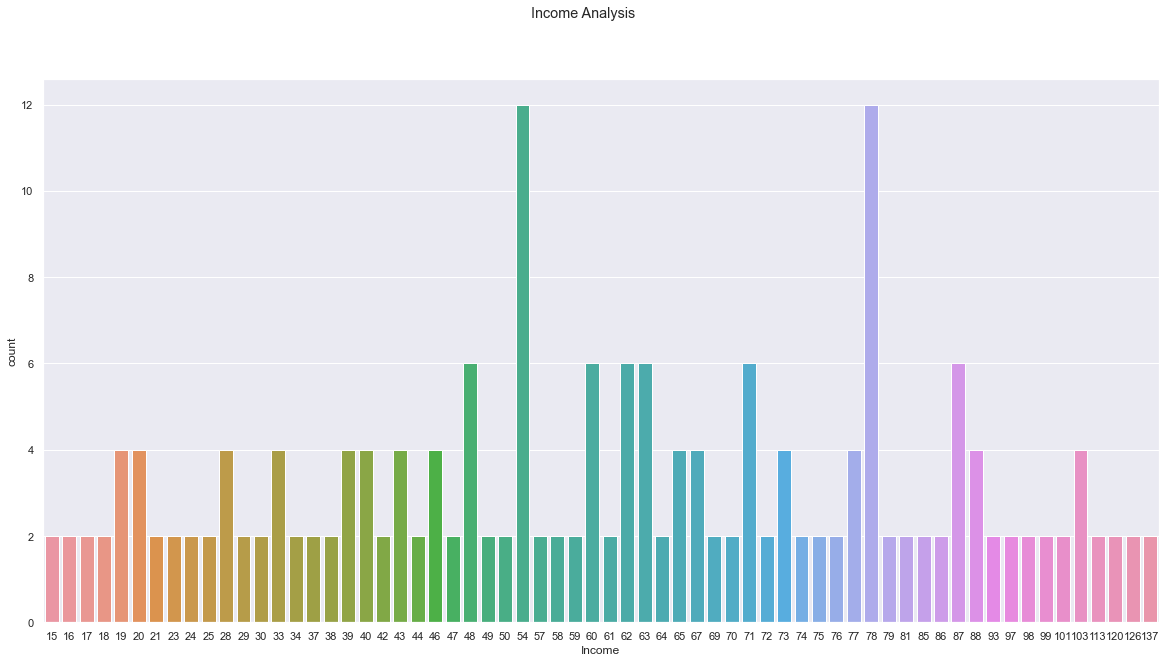

In [42]:
plt.figure(figsize = (20,10))
plt.suptitle('Income Analysis')
sns.countplot(df['Income'])

### Data Preprocessing

In [92]:
df.drop(columns = ['CustomerID'], axis = 1, inplace = True)

In [93]:
df.head()

,Gender,Age,Income,SpendScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Feature Selection

In [106]:
x=df.iloc[:,[2,3]].values

### DBSCAN

In [107]:
dbscan = DBSCAN(eps=3,min_samples=4,metric='euclidean')

In [108]:
dbscan.fit(x)

DBSCAN(eps=3, min_samples=4)

In [109]:
label = dbscan.labels_

In [110]:
s_labels = pd.Series(label)

In [111]:
s_labels.value_counts()

-1    121
 2     28
 1     15
 0     10
 4      6
 3      4
 5      4
 6      4
 7      4
 8      4
dtype: int64

In [112]:
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[dbscan.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 9


#### Predictions

Text(0.5, 1.0, 'Clusters of data')

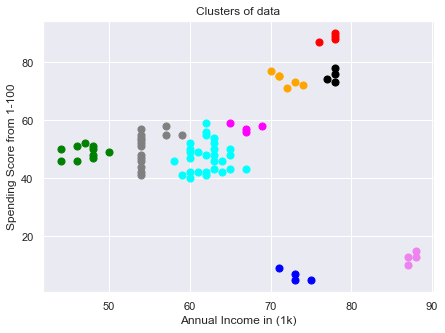

In [123]:
y_means = db.fit_predict(x)
plt.figure(figsize=(7,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'green')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'gray')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_means == 5, 0], x[y_means == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_means == 6, 0], x[y_means == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_means == 7, 0], x[y_means == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_means == 8, 0], x[y_means == 8, 1], s = 50, c = 'violet')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')

Text(0, 0.5, 'Ecuclidean Distance')

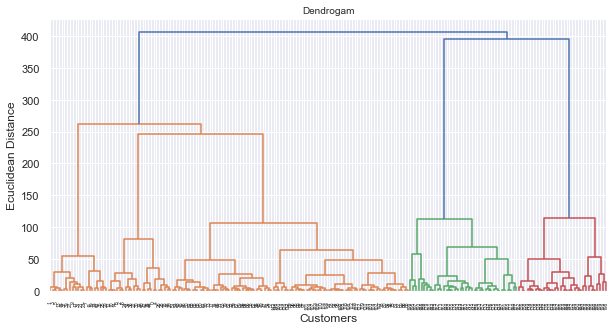

In [140]:
plt.figure(figsize = (10, 5))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 10)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')

### Herarchical clustering

In [160]:
hc_model = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')

AgglomerativeClustering(n_clusters=9)

#### Predictions

In [162]:
y_hc = hc_model.fit_predict(x)

No handles with labels found to put in legend.


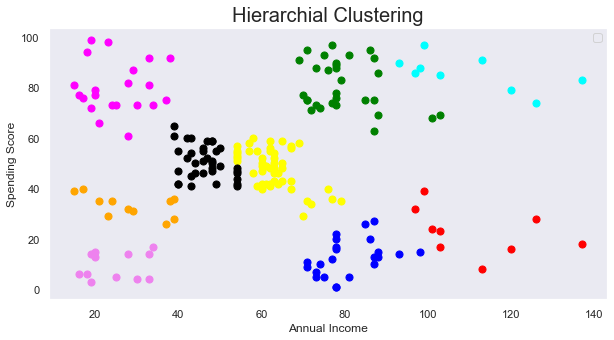

In [163]:
plt.figure(figsize = (10, 5))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 50, c = 'green')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 50, c = 'yellow')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 50, c = 'cyan')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 50, c = 'magenta')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 50, c = 'orange')
plt.scatter(x[y_hc == 5, 0], x[y_hc == 5, 1], s = 50, c = 'blue')
plt.scatter(x[y_hc == 6, 0], x[y_hc == 6, 1], s = 50, c = 'red')
plt.scatter(x[y_hc == 7, 0], x[y_hc == 7, 1], s = 50, c = 'black')
plt.scatter(x[y_hc == 8, 0], x[y_hc == 8, 1], s = 50, c = 'violet')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()